<a href="https://colab.research.google.com/github/KaranDave31/Inventory-Management-Using-AI/blob/main/IM_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TO DO**


ARIMA

LSTM







# Preprocessing and Visualization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Inventory Management/sales_inventory.csv')

In [ ]:
df

Date Store ID Product ID     Category Region  Inventory Level  \
0      2022-01-01     S001      P0001    Groceries  North              231   
1      2022-01-01     S001      P0002         Toys  South              204   
2      2022-01-01     S001      P0003         Toys   West              102   
3      2022-01-01     S001      P0004         Toys  North              469   
4      2022-01-01     S001      P0005  Electronics   East              166   
...           ...      ...        ...          ...    ...              ...   
73095  2024-01-01     S005      P0016    Furniture   East               96   
73096  2024-01-01     S005      P0017         Toys  North              313   
73097  2024-01-01     S005      P0018     Clothing   West              278   
73098  2024-01-01     S005      P0019         Toys   East              374   
73099  2024-01-01     S005      P0020    Groceries   East              117   

       Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0             127             55           135.47  33.50        20   
1             150             66           144.04  63.01        20   
2              65             51            74.02  27.99        10   
3              61            164            62.18  32.72        10   
4              14            135             9.26  73.64         0   
...           ...            ...              ...    ...       ...   
73095           8            127            18.46  73.73        20   
73096          51            101            48.43  82.57        10   
73097          36            151            39.65  11.11        10   
73098         264             21           270.52  53.14        20   
73099           6            165             2.33  78.39        20   

      Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0                 Rainy                  0               29.69      Autumn  
1                 Sunny                  0               66.16      Autumn  
2                 Sunny                  1               31.32      Summer  
3                Cloudy                  1               34.74      Autumn  
4                 Sunny                  0               68.95      Summer  
...                 ...                ...                 ...         ...  
73095             Snowy                  0               72.45      Winter  
73096            Cloudy                  0               83.78      Autumn  
73097             Rainy                  0               10.91      Winter  
73098             Rainy                  0               55.80      Spring  
73099             Rainy                  1               79.52      Spring  

[73100 rows x 15 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

<Axes: >

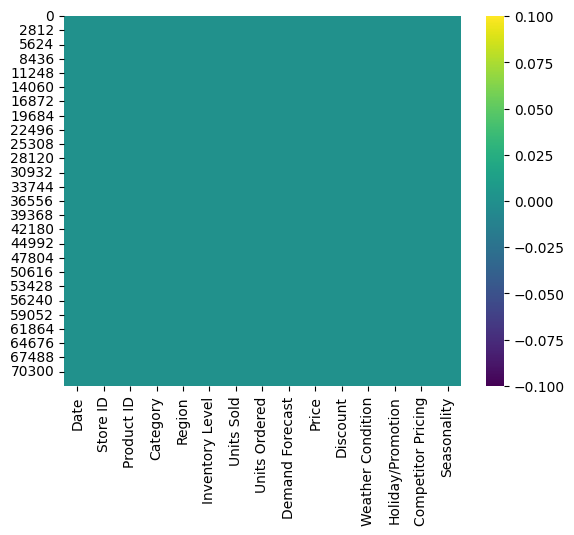

In [ ]:
sns.heatmap(df.isna(), cmap='viridis')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date'].nunique()

731

In [ ]:
df['Region'].unique()

array(['North', 'South', 'West', 'East'], dtype=object)

In [ ]:
df['Category'].unique()

array(['Groceries', 'Toys', 'Electronics', 'Furniture', 'Clothing'],
      dtype=object)

In [ ]:
df['Inventory Level'].nunique()

451

In [ ]:
df['Store ID'].nunique()

5

In [ ]:
sales_by_date = df.groupby('Date')['Units Sold'].sum()

fig = px.line(sales_by_date, x=sales_by_date.index, y='Units Sold', title='Total Sales Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Total Sales')
fig.show()

In [ ]:
sales_by_region = df.groupby('Region')['Units Sold'].sum()

fig = px.pie(sales_by_region, values='Units Sold', names=sales_by_region.index,
             title='Distribution of Sales by Region')
fig.show()

sales_by_category = df.groupby('Category')['Units Sold'].sum()

fig = px.pie(sales_by_category, values='Units Sold', names=sales_by_category.index,
             title='Distribution of Sales by Category')
fig.show()

sales_by_store = df.groupby('Store ID')['Units Sold'].sum()

fig = px.pie(sales_by_store, values='Units Sold', names=sales_by_store.index,
             title='Distribution of Sales by Store')
fig.show()

sales_by_weather = df.groupby('Weather Condition')['Units Sold'].sum()

fig = px.pie(sales_by_weather,
             values='Units Sold',
             names=sales_by_weather.index,
             title='Sales Distribution by Weather Condition')

fig.show()

seasonal_sales = df.groupby('Seasonality')['Units Sold'].sum().reset_index()

fig = px.pie(seasonal_sales, values='Units Sold', names='Seasonality', title='Sales Distribution by Seasonality')
fig.show()

In [ ]:
fig = px.box(df, x="Region", y="Units Sold", title="Distribution of Total Sales across Regions")
fig.show()

fig = px.box(df, x="Category", y="Units Sold", title="Distribution of Total Sales according to Category")
fig.show()

fig = px.box(df, x="Store ID", y="Units Sold", title="Distribution of Total Sales by different Stores")
fig.show()

fig = px.box(df, x="Weather Condition", y="Units Sold", title="Distribution of Total Sales in different weather conditions")
fig.show()

fig = px.box(df, x="Seasonality", y="Units Sold", title="Distribution of Total Sales in different seasons")
fig.show()

In [ ]:
DiscountCounts = df['Discount'].value_counts().reset_index()
DiscountCounts

Discount  count
0        20  14715
1         0  14662
2        15  14624
3         5  14591
4        10  14508

In [ ]:
fig = px.pie(DiscountCounts, values='count', names='Discount', title='Discount Distribution')
fig.show()



In [ ]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Units Sold'].sum()

highest_sales_month = monthly_sales.idxmax()
highest_sales_value = monthly_sales.max()

print(f"The month with the highest sales is: {highest_sales_month}")
print(f"The highest sales value is: {highest_sales_value}")

The month with the highest sales is: 2023-07
The highest sales value is: 437919


In [ ]:
df_2023_07 = df[(df['Date'].dt.year == 2023) & (df['Date'].dt.month == 7)]

daily_sales_2023_07 = df_2023_07.groupby(df_2023_07['Date'].dt.day)['Units Sold'].sum()

fig = px.line(daily_sales_2023_07, x=daily_sales_2023_07.index, y='Units Sold',
              title='Daily Units Sold in July 2023')
fig.update_xaxes(title_text='Day of July')
fig.update_yaxes(title_text='Units Sold')
fig.show()

In [ ]:
category_prices = df.groupby('Category')['Price'].mean()
highest_price_category = category_prices.idxmax()
lowest_price_category = category_prices.idxmin()

print(f"Category with highest average price: {highest_price_category}")
print(f"Category with lowest average price: {lowest_price_category}")

Category with highest average price: Electronics
Category with lowest average price: Clothing


In [ ]:
def calculate_information_gain(df, target_column, feature_column):
    # Calculate entropy of the target variable
    target_counts = df[target_column].value_counts()
    total_count = len(df)
    target_probabilities = target_counts / total_count
    entropy_target = -np.sum(target_probabilities * np.log2(target_probabilities))

    # Calculate weighted average entropy of the target variable given the feature
    feature_values = df[feature_column].unique()
    weighted_entropy = 0
    for value in feature_values:
        subset = df[df[feature_column] == value]
        subset_counts = subset[target_column].value_counts()
        subset_total = len(subset)
        subset_probabilities = subset_counts / subset_total
        entropy_subset = -np.sum(subset_probabilities * np.log2(subset_probabilities))
        weighted_entropy += (subset_total / total_count) * entropy_subset

    information_gain = entropy_target - weighted_entropy
    return information_gain

target_column = 'Units Sold'
columns_to_analyze = ['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Month']

for column in columns_to_analyze:
    gain = calculate_information_gain(df, target_column, column)
    print(f"Information Gain for {column}: {gain}")

Information Gain for Date: 2.1313198065235213
Information Gain for Store ID: 0.02030910705124178
Information Gain for Product ID: 0.09643790966852883
Information Gain for Category: 0.02015505869293932
Information Gain for Region: 0.015092224395726106
Information Gain for Inventory Level: 1.7932972722435387
Information Gain for Units Sold: 8.472301806727158
Information Gain for Units Ordered: 0.8223253726323057
Information Gain for Demand Forecast: 7.06542558544965
Information Gain for Price: 5.387732429019643
Information Gain for Discount: 0.02016835628431224
Information Gain for Weather Condition: 0.015157847961726034
Information Gain for Holiday/Promotion: 0.004905160207968606
Information Gain for Competitor Pricing: 5.456699781305613
Information Gain for Seasonality: 0.015591026026825716
Information Gain for Month: 0.12287102085445412


In [ ]:
from scipy.stats import chi2_contingency

def calculate_chi_square(df, target_column):
    """
    Calculates the chi-square statistic for all columns against the target column.

    Args:
        df: The input DataFrame.
        target_column: The name of the target column.

    Returns:
        A dictionary where keys are column names and values are chi-square results.
    """

    results = {}
    for col in df.columns:
        if col != target_column and pd.api.types.is_numeric_dtype(df[col]) == False: # Skip the target column itself and numeric columns
          contingency_table = pd.crosstab(df[col], df[target_column])
          chi2, p, dof, expected = chi2_contingency(contingency_table)
          results[col] = {
              "chi2": chi2,
              "p-value": p,
              "degrees_of_freedom": dof,
          }
    return results

chi_square_results = calculate_chi_square(df, 'Units Sold')

# Print the results
for col, result in chi_square_results.items():
    print(f"Chi-square test for {col} vs. Units Sold:")
    print(f"  Chi2: {result['chi2']:.4f}")
    print(f"  p-value: {result['p-value']:.4f}")
    print(f"  Degrees of freedom: {result['degrees_of_freedom']}")
    print("-" * 20)

Chi-square test for Date vs. Units Sold:
  Chi2: 362208.5314
  p-value: 0.7598
  Degrees of freedom: 362810
--------------------
Chi-square test for Store ID vs. Units Sold:
  Chi2: 2010.0386
  p-value: 0.3599
  Degrees of freedom: 1988
--------------------
Chi-square test for Product ID vs. Units Sold:
  Chi2: 9357.0446
  p-value: 0.7332
  Degrees of freedom: 9443
--------------------
Chi-square test for Category vs. Units Sold:
  Chi2: 2001.1843
  p-value: 0.4132
  Degrees of freedom: 1988
--------------------
Chi-square test for Region vs. Units Sold:
  Chi2: 1502.7485
  p-value: 0.4103
  Degrees of freedom: 1491
--------------------
Chi-square test for Weather Condition vs. Units Sold:
  Chi2: 1501.6201
  p-value: 0.4183
  Degrees of freedom: 1491
--------------------
Chi-square test for Seasonality vs. Units Sold:
  Chi2: 1540.0116
  p-value: 0.1840
  Degrees of freedom: 1491
--------------------
Chi-square test for Month vs. Units Sold:
  Chi2: 12341.2394
  p-value: 0.0040
  Degr

# INVENTORY MANAGEMENT


In [ ]:
# leadTime = 5
# service_level = 0.95  # 95% service level
# Z = 1.645

In [ ]:
# daily_demand = df.groupby(["Date", "Category"])["Units Sold"].sum().reset_index()
# daily_demand.rename(columns={"Units Sold": "Daily_Demand"}, inplace=True)

In [ ]:
# product_demand_stats = (
#     daily_demand.groupby("Category")["Daily_Demand"]
#     .agg(Average_Daily_Demand="mean", Std_Dev_Daily_Demand="std")
#     .reset_index()
# )

In [ ]:
# product_demand_stats

In [ ]:
# product_demand_stats["Std_Dev_Lead_Time"] = (
#     np.sqrt(leadTime) * product_demand_stats["Std_Dev_Daily_Demand"]
# )
# product_demand_stats["Safety_Stock"] = Z * product_demand_stats["Std_Dev_Lead_Time"]
# product_demand_stats["Reorder_Point"] = (
#     product_demand_stats["Average_Daily_Demand"] * leadTime
# ) + product_demand_stats["Safety_Stock"]

In [ ]:
# product_demand_stats

In [ ]:
df["Total_Revenue"] = df["Units Sold"] * df["Price"]

In [ ]:
df

Date Store ID Product ID     Category Region  Inventory Level  \
0     2022-01-01     S001      P0001    Groceries  North              231   
1     2022-01-01     S001      P0002         Toys  South              204   
2     2022-01-01     S001      P0003         Toys   West              102   
3     2022-01-01     S001      P0004         Toys  North              469   
4     2022-01-01     S001      P0005  Electronics   East              166   
...          ...      ...        ...          ...    ...              ...   
73095 2024-01-01     S005      P0016    Furniture   East               96   
73096 2024-01-01     S005      P0017         Toys  North              313   
73097 2024-01-01     S005      P0018     Clothing   West              278   
73098 2024-01-01     S005      P0019         Toys   East              374   
73099 2024-01-01     S005      P0020    Groceries   East              117   

       Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0             127             55           135.47  33.50        20   
1             150             66           144.04  63.01        20   
2              65             51            74.02  27.99        10   
3              61            164            62.18  32.72        10   
4              14            135             9.26  73.64         0   
...           ...            ...              ...    ...       ...   
73095           8            127            18.46  73.73        20   
73096          51            101            48.43  82.57        10   
73097          36            151            39.65  11.11        10   
73098         264             21           270.52  53.14        20   
73099           6            165             2.33  78.39        20   

      Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  \
0                 Rainy                  0               29.69      Autumn   
1                 Sunny                  0               66.16      Autumn   
2                 Sunny                  1               31.32      Summer   
3                Cloudy                  1               34.74      Autumn   
4                 Sunny                  0               68.95      Summer   
...                 ...                ...                 ...         ...   
73095             Snowy                  0               72.45      Winter   
73096            Cloudy                  0               83.78      Autumn   
73097             Rainy                  0               10.91      Winter   
73098             Rainy                  0               55.80      Spring   
73099             Rainy                  1               79.52      Spring   

         Month  Total_Revenue  
0      2022-01        4254.50  
1      2022-01        9451.50  
2      2022-01        1819.35  
3      2022-01        1995.92  
4      2022-01        1030.96  
...        ...            ...  
73095  2024-01         589.84  
73096  2024-01        4211.07  
73097  2024-01         399.96  
73098  2024-01       14028.96  
73099  2024-01         470.34  

[73100 rows x 17 columns]

In [ ]:
grouped_df = df.groupby(
    ["Region", "Category", "Weather Condition", "Seasonality"]
)["Units Sold"].sum().reset_index()

In [ ]:
grouped_df = grouped_df.sort_values(by="Units Sold", ascending=False)

In [ ]:
grouped_df["Cumulative_Units_Sold"] = grouped_df["Units Sold"].cumsum()
grouped_df["Cumulative_Percentage"] = (
    grouped_df["Cumulative_Units_Sold"] / grouped_df["Units Sold"].sum()
) * 100

In [ ]:
def assign_abc(cumulative_percentage):
    if cumulative_percentage <= 70:
        return "A"
    elif cumulative_percentage <= 90:
        return "B"
    else:
        return "C"

In [ ]:
grouped_df["ABC_Category"] = grouped_df["Cumulative_Percentage"].apply(assign_abc)

In [ ]:
grouped_df

Region     Category Weather Condition Seasonality  Units Sold  \
197  South    Furniture             Rainy      Spring       38600   
63    East    Groceries             Sunny      Winter       38080   
115  North    Furniture            Cloudy      Winter       37750   
8     East     Clothing             Snowy      Autumn       37439   
59    East    Groceries             Snowy      Winter       37337   
..     ...          ...               ...         ...         ...   
101  North  Electronics             Rainy      Spring       26135   
303   West    Groceries             Sunny      Winter       25782   
23    East  Electronics             Rainy      Winter       25063   
187  South  Electronics             Snowy      Winter       24903   
310   West         Toys             Rainy      Summer       24168   

     Cumulative_Units_Sold  Cumulative_Percentage ABC_Category  
197                  38600               0.386945            A  
63                   76680               0.768677            A  
115                 114430               1.147101            A  
8                   151869               1.522407            A  
59                  189206               1.896691            A  
..                     ...                    ...          ...  
101                9875666              98.998394            C  
303                9901448              99.256845            C  
23                 9926511              99.508089            C  
187                9951414              99.757728            C  
310                9975582             100.000000            C  

[320 rows x 8 columns]

In [ ]:
df2 = df.copy()

In [ ]:
df2

Date Store ID Product ID     Category Region  Inventory Level  \
0     2022-01-01     S001      P0001    Groceries  North              231   
1     2022-01-01     S001      P0002         Toys  South              204   
2     2022-01-01     S001      P0003         Toys   West              102   
3     2022-01-01     S001      P0004         Toys  North              469   
4     2022-01-01     S001      P0005  Electronics   East              166   
...          ...      ...        ...          ...    ...              ...   
73095 2024-01-01     S005      P0016    Furniture   East               96   
73096 2024-01-01     S005      P0017         Toys  North              313   
73097 2024-01-01     S005      P0018     Clothing   West              278   
73098 2024-01-01     S005      P0019         Toys   East              374   
73099 2024-01-01     S005      P0020    Groceries   East              117   

       Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0             127             55           135.47  33.50        20   
1             150             66           144.04  63.01        20   
2              65             51            74.02  27.99        10   
3              61            164            62.18  32.72        10   
4              14            135             9.26  73.64         0   
...           ...            ...              ...    ...       ...   
73095           8            127            18.46  73.73        20   
73096          51            101            48.43  82.57        10   
73097          36            151            39.65  11.11        10   
73098         264             21           270.52  53.14        20   
73099           6            165             2.33  78.39        20   

      Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  \
0                 Rainy                  0               29.69      Autumn   
1                 Sunny                  0               66.16      Autumn   
2                 Sunny                  1               31.32      Summer   
3                Cloudy                  1               34.74      Autumn   
4                 Sunny                  0               68.95      Summer   
...                 ...                ...                 ...         ...   
73095             Snowy                  0               72.45      Winter   
73096            Cloudy                  0               83.78      Autumn   
73097             Rainy                  0               10.91      Winter   
73098             Rainy                  0               55.80      Spring   
73099             Rainy                  1               79.52      Spring   

         Month  Total_Revenue  
0      2022-01        4254.50  
1      2022-01        9451.50  
2      2022-01        1819.35  
3      2022-01        1995.92  
4      2022-01        1030.96  
...        ...            ...  
73095  2024-01         589.84  
73096  2024-01        4211.07  
73097  2024-01         399.96  
73098  2024-01       14028.96  
73099  2024-01         470.34  

[73100 rows x 17 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
enc = OneHotEncoder()

In [ ]:
X = df2[['Region', 'Category', 'Weather Condition', 'Seasonality','Date', 'Store ID']]

In [ ]:
df2

Date Store ID Product ID     Category Region  Inventory Level  \
0     2022-01-01     S001      P0001    Groceries  North              231   
1     2022-01-01     S001      P0002         Toys  South              204   
2     2022-01-01     S001      P0003         Toys   West              102   
3     2022-01-01     S001      P0004         Toys  North              469   
4     2022-01-01     S001      P0005  Electronics   East              166   
...          ...      ...        ...          ...    ...              ...   
73095 2024-01-01     S005      P0016    Furniture   East               96   
73096 2024-01-01     S005      P0017         Toys  North              313   
73097 2024-01-01     S005      P0018     Clothing   West              278   
73098 2024-01-01     S005      P0019         Toys   East              374   
73099 2024-01-01     S005      P0020    Groceries   East              117   

       Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0             127             55           135.47  33.50        20   
1             150             66           144.04  63.01        20   
2              65             51            74.02  27.99        10   
3              61            164            62.18  32.72        10   
4              14            135             9.26  73.64         0   
...           ...            ...              ...    ...       ...   
73095           8            127            18.46  73.73        20   
73096          51            101            48.43  82.57        10   
73097          36            151            39.65  11.11        10   
73098         264             21           270.52  53.14        20   
73099           6            165             2.33  78.39        20   

      Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  \
0                 Rainy                  0               29.69      Autumn   
1                 Sunny                  0               66.16      Autumn   
2                 Sunny                  1               31.32      Summer   
3                Cloudy                  1               34.74      Autumn   
4                 Sunny                  0               68.95      Summer   
...                 ...                ...                 ...         ...   
73095             Snowy                  0               72.45      Winter   
73096            Cloudy                  0               83.78      Autumn   
73097             Rainy                  0               10.91      Winter   
73098             Rainy                  0               55.80      Spring   
73099             Rainy                  1               79.52      Spring   

         Month  Total_Revenue  
0      2022-01        4254.50  
1      2022-01        9451.50  
2      2022-01        1819.35  
3      2022-01        1995.92  
4      2022-01        1030.96  
...        ...            ...  
73095  2024-01         589.84  
73096  2024-01        4211.07  
73097  2024-01         399.96  
73098  2024-01       14028.96  
73099  2024-01         470.34  

[73100 rows x 17 columns]

In [ ]:
encoded_data = pd.get_dummies(X, columns=['Region', 'Category', 'Weather Condition', 'Seasonality'])
df2 = pd.concat([df2, encoded_data], axis=1)
df2

Date Store ID Product ID     Category Region  Inventory Level  \
0     2022-01-01     S001      P0001    Groceries  North              231   
1     2022-01-01     S001      P0002         Toys  South              204   
2     2022-01-01     S001      P0003         Toys   West              102   
3     2022-01-01     S001      P0004         Toys  North              469   
4     2022-01-01     S001      P0005  Electronics   East              166   
...          ...      ...        ...          ...    ...              ...   
73095 2024-01-01     S005      P0016    Furniture   East               96   
73096 2024-01-01     S005      P0017         Toys  North              313   
73097 2024-01-01     S005      P0018     Clothing   West              278   
73098 2024-01-01     S005      P0019         Toys   East              374   
73099 2024-01-01     S005      P0020    Groceries   East              117   

       Units Sold  Units Ordered  Demand Forecast  Price  ...  \
0             127             55           135.47  33.50  ...   
1             150             66           144.04  63.01  ...   
2              65             51            74.02  27.99  ...   
3              61            164            62.18  32.72  ...   
4              14            135             9.26  73.64  ...   
...           ...            ...              ...    ...  ...   
73095           8            127            18.46  73.73  ...   
73096          51            101            48.43  82.57  ...   
73097          36            151            39.65  11.11  ...   
73098         264             21           270.52  53.14  ...   
73099           6            165             2.33  78.39  ...   

       Category_Groceries Category_Toys  Weather Condition_Cloudy  \
0                    True         False                     False   
1                   False          True                     False   
2                   False          True                     False   
3                   False          True                      True   
4                   False         False                     False   
...                   ...           ...                       ...   
73095               False         False                     False   
73096               False          True                      True   
73097               False         False                     False   
73098               False          True                     False   
73099                True         False                     False   

       Weather Condition_Rainy Weather Condition_Snowy  \
0                         True                   False   
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   
...                        ...                     ...   
73095                    False                    True   
73096                    False                   False   
73097                     True                   False   
73098                     True                   False   
73099                     True                   False   

      Weather Condition_Sunny  Seasonality_Autumn Seasonality_Spring  \
0                       False                True              False   
1                        True                True              False   
2                        True               False              False   
3                       False                True              False   
4                        True               False              False   
...                       ...                 ...                ...   
73095                   False               False              False   
73096                   False                True              False   
73097                   False               False              False   
73098                   False               False           

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# numerical_columns = ['Inventory Level', 'Units Ordered', 'Price', 'Demand Forecast']

# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
# df[numerical_columns]

Inventory Level  Units Ordered     Price  Demand Forecast
0            -0.334516      -1.052172 -0.831423        -0.055144
1            -0.542290      -0.841754  0.302627         0.023297
2            -1.327216      -1.128687 -1.043169        -0.617599
3             1.496977       1.032872 -0.861398        -0.725971
4            -0.834714       0.478135  0.711131        -1.210350
...                ...            ...       ...              ...
73095        -1.373388       0.325105  0.714590        -1.126142
73096         0.296503      -0.172245  1.054306        -0.851825
73097         0.027166       0.784197 -1.691857        -0.932189
73098         0.765919      -1.702552 -0.076671         1.180973
73099        -1.211786       1.052001  0.893671        -1.273780

[73100 rows x 4 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df2.drop(['Units Sold', 'Date', 'Region', 'Category', 'Weather Condition', 'Seasonality', 'Store ID', 'Product ID', 'Month', 'Total_Revenue','Discount','Holiday/Promotion','Competitor Pricing'], axis=1)
y = df2['Units Sold']




In [ ]:
X

Inventory Level  Units Ordered  Demand Forecast  Price  Region_East  \
0                  231             55           135.47  33.50        False   
1                  204             66           144.04  63.01        False   
2                  102             51            74.02  27.99        False   
3                  469            164            62.18  32.72        False   
4                  166            135             9.26  73.64         True   
...                ...            ...              ...    ...          ...   
73095               96            127            18.46  73.73         True   
73096              313            101            48.43  82.57        False   
73097              278            151            39.65  11.11        False   
73098              374             21           270.52  53.14         True   
73099              117            165             2.33  78.39         True   

       Region_North  Region_South  Region_West  Category_Clothing  \
0              True         False        False              False   
1             False          True        False              False   
2             False         False         True              False   
3              True         False        False              False   
4             False         False        False              False   
...             ...           ...          ...                ...   
73095         False         False        False              False   
73096          True         False        False              False   
73097         False         False         True               True   
73098         False         False        False              False   
73099         False         False        False              False   

       Category_Electronics  ...  Category_Groceries  Category_Toys  \
0                     False  ...                True          False   
1                     False  ...               False           True   
2                     False  ...               False           True   
3                     False  ...               False           True   
4                      True  ...               False          False   
...                     ...  ...                 ...            ...   
73095                 False  ...               False          False   
73096                 False  ...               False           True   
73097                 False  ...               False          False   
73098                 False  ...               False           True   
73099                 False  ...                True          False   

       Weather Condition_Cloudy  Weather Condition_Rainy  \
0                         False                     True   
1                         False                    False   
2                         False                    False   
3                          True                    False   
4                         False                    False   
...                         ...                      ...   
73095                     False                    False   
73096                      True                    False   
73097                     False                     True   
73098                     False                     True   
73099                     False                     True   

       Weather Condition_Snowy  Weather Condition_Sunny  Seasonality_Autumn  \
0                        False                    False                True   
1                        False                     True                True   
2                        False                     True               False   
3                        False                    False                True   
4                        False                     True               False   
...                        ...                      ...                 ...   
73095                     True                    False               False   
73096                    False     

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 73.97006297164113
Root Mean Squared Error (RMSE): 8.600585036591472
R-squared (R2): 0.9937523514471919


In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest - Mean Squared Error (MSE): {rf_mse}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"Random Forest - R-squared (R2): {rf_r2}")

Random Forest - Mean Squared Error (MSE): 73.83692835841313
Random Forest - Root Mean Squared Error (RMSE): 8.592841692851856
Random Forest - R-squared (R2): 0.9937635962432654


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# def forward_selection(df, target_column, max_features=None):
#     """
#     Performs forward selection feature selection.

#     Args:
#         df: The input DataFrame.
#         target_column: The name of the target column.
#         max_features: The maximum number of features to select (optional).

#     Returns:
#         A list of selected features.
#     """

#     remaining_features = [col for col in df.columns if col != target_column and pd.api.types.is_numeric_dtype(df[col])]
#     selected_features = []
#     best_mse = float('inf')

#     while remaining_features and (max_features is None or len(selected_features) < max_features):
#         best_feature = None
#         best_current_mse = float('inf')

#         for feature in remaining_features:
#             current_features = selected_features + [feature]
#             X = df[current_features]
#             y = df[target_column]
#             X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #add train test split

#             model = LinearRegression()
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)
#             current_mse = mean_squared_error(y_test, y_pred)

#             if current_mse < best_current_mse:
#                 best_current_mse = current_mse
#                 best_feature = feature

#         if best_current_mse < best_mse:
#             best_mse = best_current_mse
#             selected_features.append(best_feature)
#             remaining_features.remove(best_feature)
#         else:
#             break # No improvement, stop adding features

#     return selected_features

# # Example usage
# selected_cols = forward_selection(df, 'Units Sold', max_features=5) # Example using max 5 features. Adjust as needed.
# print("Selected Features:", selected_cols)

# MODEL BUILDING

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# df_categorical =[]
# encode = LabelEncoder()
# for column in df.columns:
#     if df[column].dtypes=="object":
#         df_categorical.append(column)

# for columns in df_categorical:
#     df[columns] = encode.fit_transform(df[columns])

In [ ]:
# from sklearn.model_selection import train_test_split

# x=df.drop(columns=["Price",'Date','Product ID','Month'])
# y = df["Price"]
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
model_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    LGBMRegressor(verbose=-1),
]

results = {}
predictions = {}

for model in model_list:
    model_name = type(model).__name__

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    results[model_name] = mse

    if model_name in ["GradientBoostingRegressor", "RandomForestRegressor", "LGBMRegressor"]:
        predictions[model_name] = y_pred

for model_name, mse in results.items():
    print(f"{model_name}: {mse}")

LinearRegression: 73.97006297164113
DecisionTreeRegressor: 140.51073871409028
RandomForestRegressor: 73.81126702462382
GradientBoostingRegressor: 71.559441109337
AdaBoostRegressor: 88.8064150620801
KNeighborsRegressor: 90.27726675786593
LGBMRegressor: 70.36879328285211


In [ ]:
# models_to_plot = ["GradientBoostingRegressor", "RandomForestRegressor", "LGBMRegressor"]

# for model_name in models_to_plot:
#     if model_name in predictions:
#         y_pred = predictions[model_name]

#         fig = go.Figure()

#         fig.add_trace(go.Scatter(
#             x=y_test,
#             y=y_pred,
#             mode='markers',
#             marker=dict(color='blue', size=8, opacity=0.6),
#             name=f'Predicted vs Actual ({model_name})'
#         ))

#         fig.add_trace(go.Scatter(
#             x=[min(y_test), max(y_test)],
#             y=[min(y_test), max(y_test)],
#             mode='lines',
#             line=dict(color='red', dash='dash'),
#             name='Ideal Prediction Line'
#         ))

#         fig.update_layout(
#             title=f"Actual vs Predicted Values - {model_name}",
#             xaxis_title="Actual Values",
#             yaxis_title="Predicted Values",
#             legend=dict(x=0.8, y=1),
#             template="plotly_white",
#             width=800,
#             height=600
#         )

#         fig.show()

In [ ]:
# from tabulate import tabulate

# def evaluate_model(model, x_train, y_train, x_test, y_test):
#     # Calculate metrics
#     train_r2 = model.score(x_train, y_train)
#     y_pred = model.predict(x_test)
#     test_r2 = r2_score(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     mae = mean_absolute_error(y_test, y_pred)

#     # Prepare the table data
#     metrics = [
#         ["Training R² Score", f"{train_r2:.4f}"],
#         ["Testing R² Score", f"{test_r2:.4f}"],
#         ["Mean Squared Error (MSE)", f"{mse:.2f}"],
#         ["Root Mean Squared Error (RMSE)", f"{rmse:.2f}"],
#         ["Mean Absolute Error (MAE)", f"{mae:.2f}"],
#     ]

#     # Print the table
#     print(tabulate(metrics, headers=["Metric", "Value"], tablefmt="grid"))
# evaluate_model(lr, x_train, y_train, x_test, y_test)
